<h1>Pymaceuticals Inc.</h1>

<h2>Analysis</h2>
<ul>
    <li>Add your analysis here.</li>
</ul>


There are many observations and conclusions that can be made from the below data including: Effectiveness of Capomulin and Ramicane, tumor volume distribution and, outliers, and correlation between mouse Weight and tumor volume. 

The Capomulin and Ramicane regimens show the highest number of data points, indicating they were the most commonly used treatments in the study.
Both regimens have lower final tumor volumes compared to other treatments, suggesting that these regimens are more effective in reducing tumor size.

Additionally observations shown in the box plot is that Capomulin and Ramicane have smaller interquartile ranges, indicating more consistent treatment outcomes among the mice. Outliers are less frequent in the Capomulin regimen, which suggests it produces more reliable results in terms of tumor volume reduction. This plot also demonstarates consistency accross regimens; Capomulin and Ramicane not only have lower average tumor volumes but also show less variability in tumor volume among different mice, as indicated by the smaller interquartile range in the box plots. This consistency suggests these treatments might offer more predictable outcomes compared to others like Infubinol and Ceftamin.  Capomulin and Ramicane not only have lower average tumor volumes but also show less variability in tumor volume among different mice, as indicated by the smaller interquartile range in the box plots. This consistency suggests these treatments might offer more predictable outcomes compared to others like Infubinol and Ceftamin.

There is also a positive correlation between mouse weight and average tumor volume for the Capomulin regimen, with a correlation coefficient of approximately 0.84, indicating a strong correlation.
The linear regression analysis supports this, with the regression line showing that as mouse weight increases, the average tumor volume also tends to increase.

An interesting observation is the nearly equal distribution of male and female mice ensures that the study results are balanced and not biased towards one gender. This balance helps in generalizing the study findings across both genders. By analyzing the data further by segregating it based on gender might reveal if there are any gender-specific responses to the treatments, which can be crucial for personalized medicine approaches.

# Pymaceuticals Inc.
---


 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')


# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
# Checking the number of mice.
total_number_of_mice = combined_data.shape[0]

total_number_of_mice


1893

In [114]:
# Our data should be uniquely identified by Mouse ID and Timepoint

duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Display the duplicate entries
duplicate_mice
# Display the duplicate mouse id's
duplicate_mouse_ids


array(['g989'], dtype=object)

In [115]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

duplicate_mice_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

cleaned_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [117]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = cleaned_data['Mouse ID'].nunique()

number_of_mice_cleaned




248

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_grouped = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = regimen_grouped.mean()
median_tumor_volume = regimen_grouped.median()
variance_tumor_volume = regimen_grouped.var()
std_dev_tumor_volume = regimen_grouped.std()
sem_tumor_volume = regimen_grouped.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

# Display the summary statistics DataFrame
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem'
)


# Display the summary statistics DataFrame
summary_statistics_agg


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

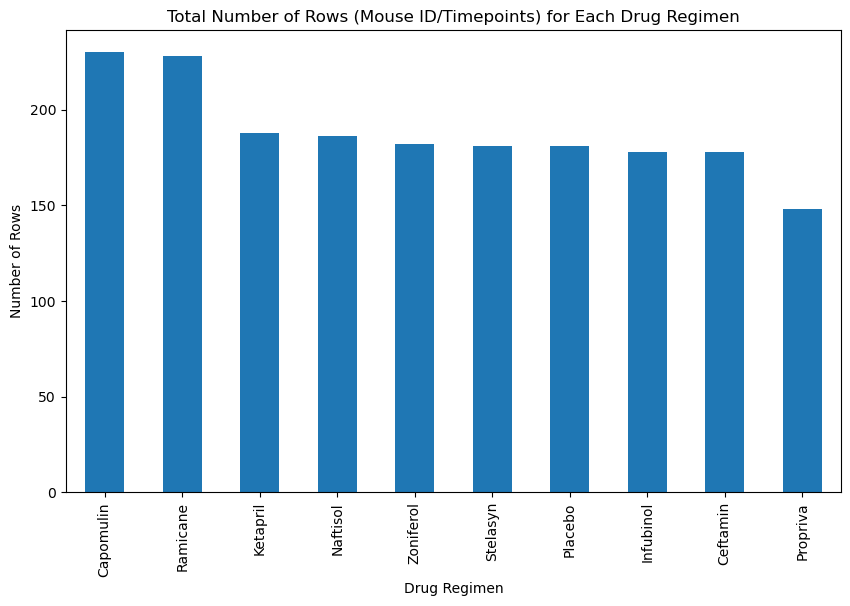

In [120]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', figsize=(10,6))

# Add titles and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()


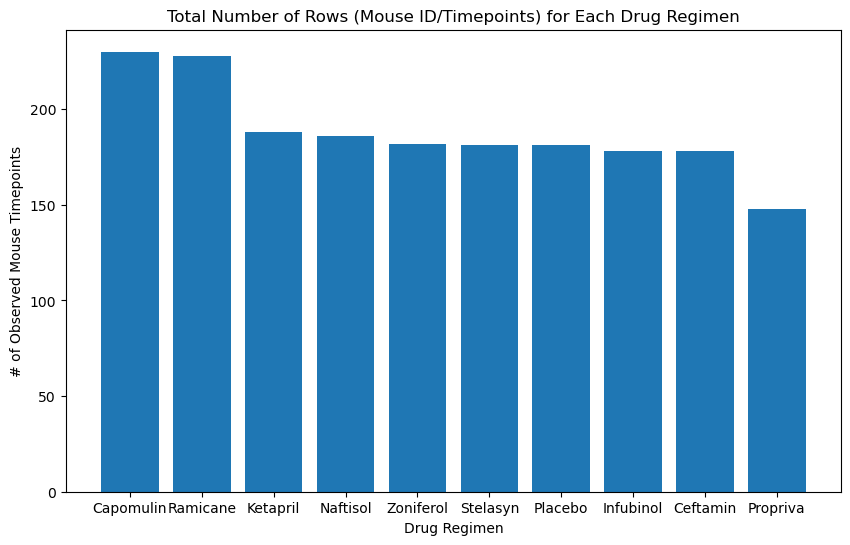

In [121]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)

# Add titles and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()


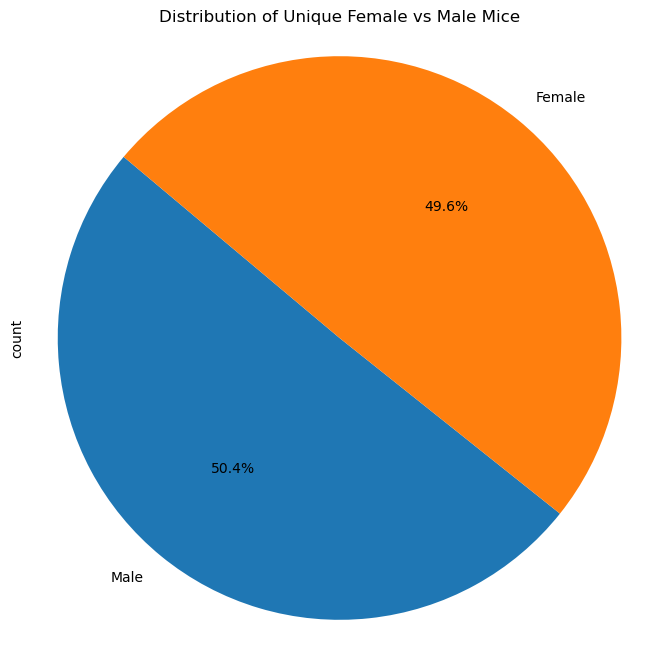

In [122]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Generate a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8),)

# Add a title
plt.title('Distribution of Unique Female vs Male Mice')

plt.axis('equal')


# Make the pie chart
plt.show()


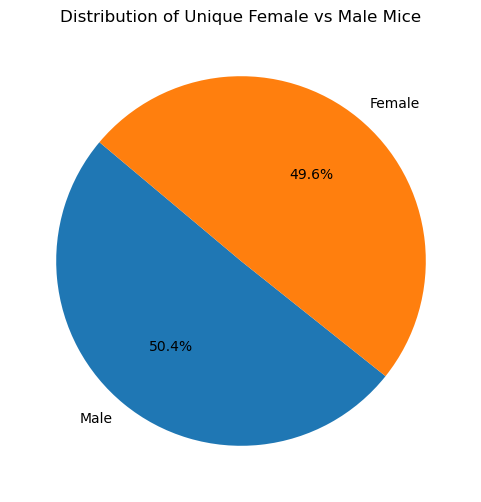

In [123]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Make the pie chart using pyplot
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])

# Add a title
plt.title('Distribution of Unique Female vs Male Mice')

# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoints.columns = ['Mouse ID', 'Max Timepoint']
max_timepoints.head()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoints, filtered_data, left_on=['Mouse ID', 'Max Timepoint'], right_on=['Mouse ID', 'Timepoint'], how='left')

# Select relevant columns
final_tumor_volume = merged_data[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

final_tumor_volume.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543


In [125]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    
quartiles = drug_data.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f'{drug} IQR: {iqr}')


    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)']


    # add subset
    tumor_vol_data.append(drug_data)


# Determine outliers using upper and lower bound

outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
print(f'{drug} Outliers: {outliers}')

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f'{drug} Lower Bound: {lower_bound}')
print(f'{drug} Upper Bound: {upper_bound}')

# Output the outliers data
outliers_data = pd.DataFrame(columns=['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)'])
outliers_data


Ceftamin IQR: 15.577752179999997
Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin Lower Bound: 25.355449580000002
Ceftamin Upper Bound: 87.66645829999999


,Drug Regimen,Mouse ID,Tumor Volume (mm3)


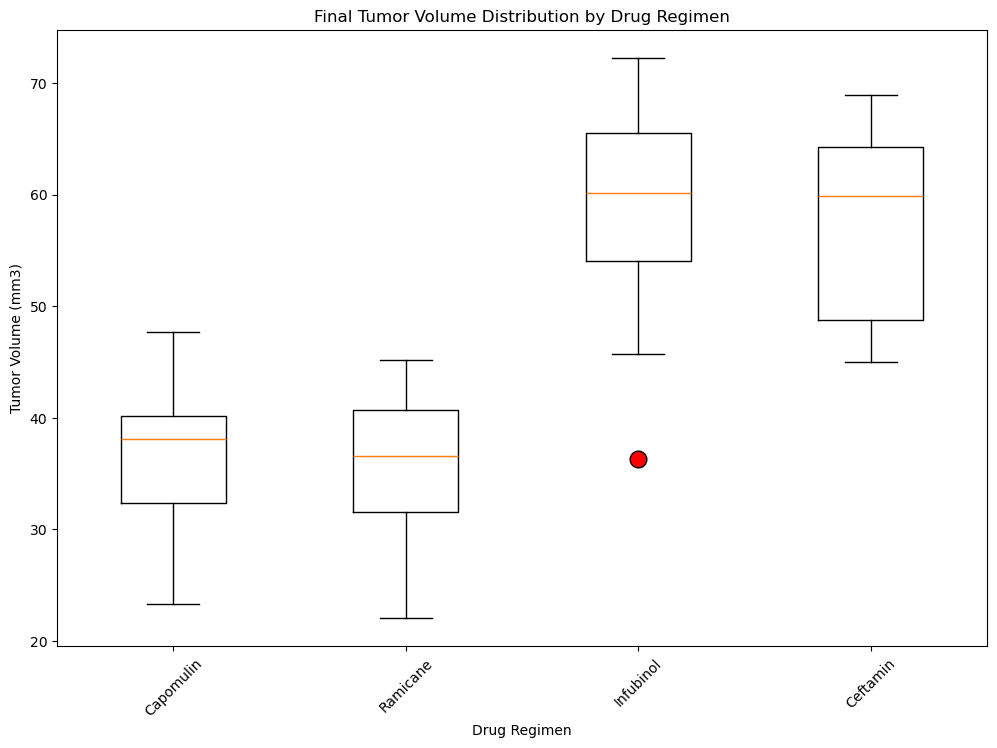

In [126]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(12, 8))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'markerfacecolor': 'r', 'markersize': 12})
plt.title('Final Tumor Volume Distribution by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

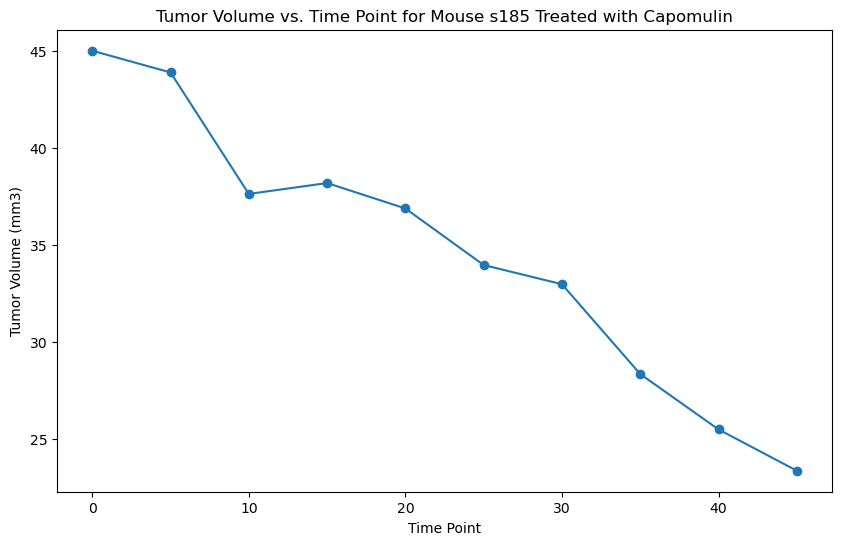

In [127]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
selected_mouse_id = 's185'
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o')

# Add titles and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


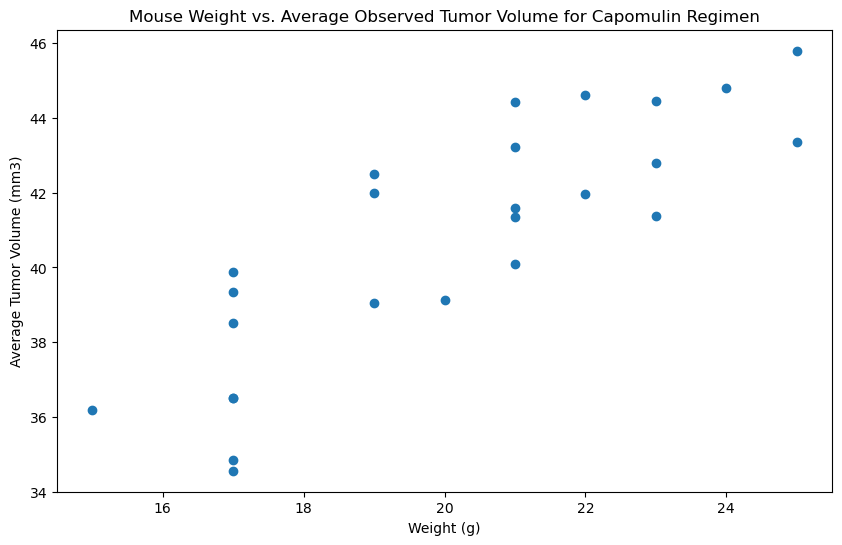

In [128]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Data for Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Mouse weight vs. the average observed tumor volume
mouse_weight = mouse_metadata[['Mouse ID', 'Weight (g)']]

# Observed tumor volume 
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_metadata[['Mouse ID', 'Weight (g)']]
average_tumor_volume.columns = ['Mouse ID', 'Average Tumor Volume (mm3)']
merged_data = pd.merge(average_tumor_volume, mouse_weight, on='Mouse ID')

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'], marker='o')


# Add titles and labels

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')

# Display the plot
plt.show()


## Correlation and Regression

In [129]:
# Calculate the correlation coefficient and a linear regression model

# Calculate the correlation coefficient
correlation, _ = st.pearsonr(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'])
print(f'Correlation coefficient: {correlation}')

# Linear regression analysis
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'])

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {rvalue**2}')
print(f'P-value: {pvalue}')
print(f'Standard error: {stderr}')

# For mouse weight and average observed tumor volume for the entire Capomulin regimen

# Entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Mouse weight
mouse_weight = mouse_metadata[['Mouse ID', 'Weight (g)']]
merged_data = pd.merge(average_tumor_volume, mouse_weight, on='Mouse ID')

# Observed tumor volume
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_tumor_volume.columns = ['Mouse ID', 'Average Tumor Volume (mm3)']


# Find the average by merging the average tumor volume data with the mouse metadata to get the weight 
mouse_weight = mouse_metadata[['Mouse ID', 'Weight (g)']]
merged_data = pd.merge(average_tumor_volume, mouse_weight, on='Mouse ID')

# linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

slope, intercept, rvalue, pvalue, stderr = st.linregress(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'])
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {rvalue**2}')
print(f'P-value: {pvalue}')
print(f'Standard error: {stderr}')




Correlation coefficient: 0.8419363424694721
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323


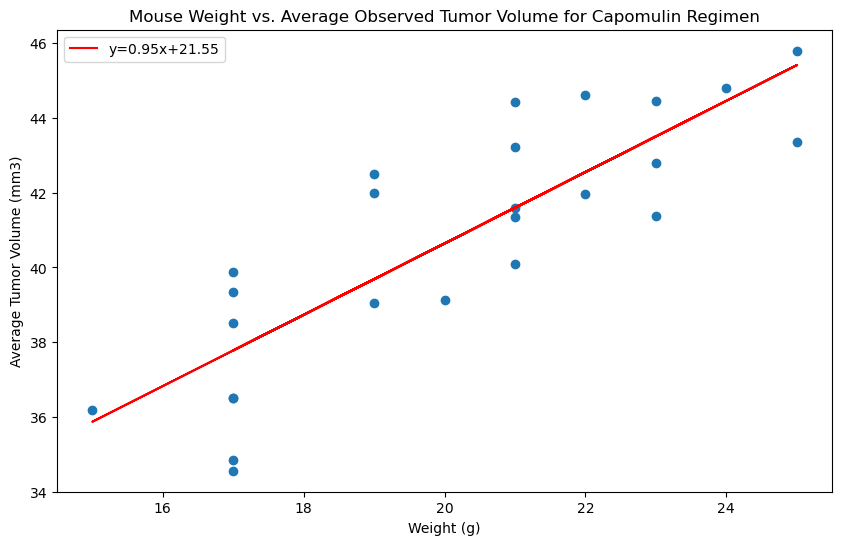

In [130]:
# Create a scatter plot and overlay the regression line.

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'], marker='o')
plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

regress_values = merged_data['Weight (g)'] * slope + intercept
plt.plot(merged_data['Weight (g)'], regress_values, 'r-', label=f'y={slope:.2f}x+{intercept:.2f}')
plt.legend()
plt.show()